## Air.csv collector in one file
- 
- 

In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = os.path.join(os.getcwd(),'static', 'data')
all_files = glob.glob(os.path.join(data_path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

list_ = []
for file_ in all_files:
    df = pd.read_csv(file_,index_col='Time', header=0)
    list_.append(df)

In [3]:
data_frame = pd.concat(list_, axis=0, ignore_index=False)
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774 entries, 2019-01-02 01:00:00 to 2019-01-04 17:00
Data columns (total 11 columns):
Unnamed: 0    774 non-null int64
SO2           774 non-null float64
NO2           774 non-null float64
O3            774 non-null float64
CO            774 non-null float64
PM10          774 non-null int64
PM2.5         774 non-null int64
TIMES         774 non-null object
CO_mod        774 non-null float64
PM10_mod      774 non-null float64
PM2.5_mod     774 non-null float64
dtypes: float64(7), int64(3), object(1)
memory usage: 72.6+ KB


In [4]:
# drop_cols = ['Unnamed: 0', 'CO_mod','PM10_mod','PM2.5_mod',]
# for drop_col in drop_cols:
#     data_frame.drop(drop_col, axis=1)
data_frame.shape  # (614, 11)

(774, 11)

In [5]:
data_frame.drop('Unnamed: 0', axis=1)
data_frame.drop('CO_mod', axis=1)
data_frame.drop('PM10_mod', axis=1)
data_frame.drop('PM2.5_mod', axis=1)

data_frame.shape  # (614, 11)

(774, 11)

In [6]:
df = data_frame.drop_duplicates(subset='TIMES', keep='first')
df.shape

(116, 11)

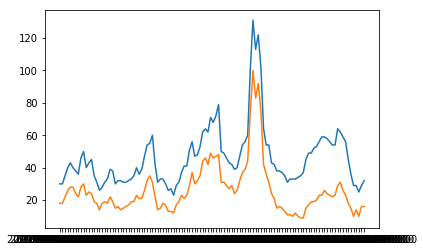

In [7]:
plt.plot(df['PM10'])
plt.plot(df['PM2.5'])
plt.show()

In [8]:
# 테스트! = 중복되는 Rows 첫번째 데이터를 남기고 삭제하기 Keep='first', 'last'
# Keep=False 인경우는 중복되는것은 아예 삭제하고 남기지 않는다.

df_array = {
    "A":["foo", "foo", "foo", "bar", "foo"], 
    "B":[0,1,1,1,0], 
    "C":["A","A","B","A", "A"],
}

df1 = pd.DataFrame(df_array)
df1

#   A	B	C
# 0	foo	0	A
# 1	foo	1	A
# 2	foo	1	B
# 3	bar	1	A

,A,B,C
0,foo,0,A
1,foo,1,A
2,foo,1,B
3,bar,1,A
4,foo,0,A


In [9]:
# 서브셋 A,B,C 가 모두 동일하면, 처음 데이터를 남기고 나머지는 삭제한다.
# 인덱스는 UID 이기 때문에 인텍스 기준으로 서브셋을 설정하면, 중복데이터 삭제됨
df1a = df1.drop_duplicates(subset=['A', 'B', 'C'], keep='first')
df1a

,A,B,C
0,foo,0,A
1,foo,1,A
2,foo,1,B
3,bar,1,A


In [10]:
df.TIMES.tolist()[-1]    # '2019.01/06(Sun)-16:00'

'2019.01/06(Sun)-20:00'

In [13]:
# Data Frame 을 엑셀로 저장한다. (CSV화일)
file_name = '2019_01_air.csv'
df.to_csv(os.path.join(data_path, file_name), sep=',', encoding='utf-8')